## Installing dependencies

In [ ]:
!pip install diffusers transformers accelerate scipy safetensors

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 35.1 MB/s eta 0:00:0000:0100:01


## Imports

In [ ]:
import torch
from torchvision import transforms
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler
from PIL import Image

## Importing Stable Diffusion 2.1 from HuggingFace

In [ ]:
# Paper:
# SeedSelect employs Stable Diffusion v2.1 with a guidance scale of 7.5 and 7 denoising steps
# using EulerDiscreteScheduler (Karras et al. 2022)

model_id = "stabilityai/stable-diffusion-2-1"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16,
    scheduler=EulerDiscreteScheduler.from_config(pipe.scheduler.config)
).to("cuda")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
pipe

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.32.0",
  "_name_or_path": "stabilityai/stable-diffusion-2-1",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": false,
  "safety_checker": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/20 [00:00<?, ?it/s]

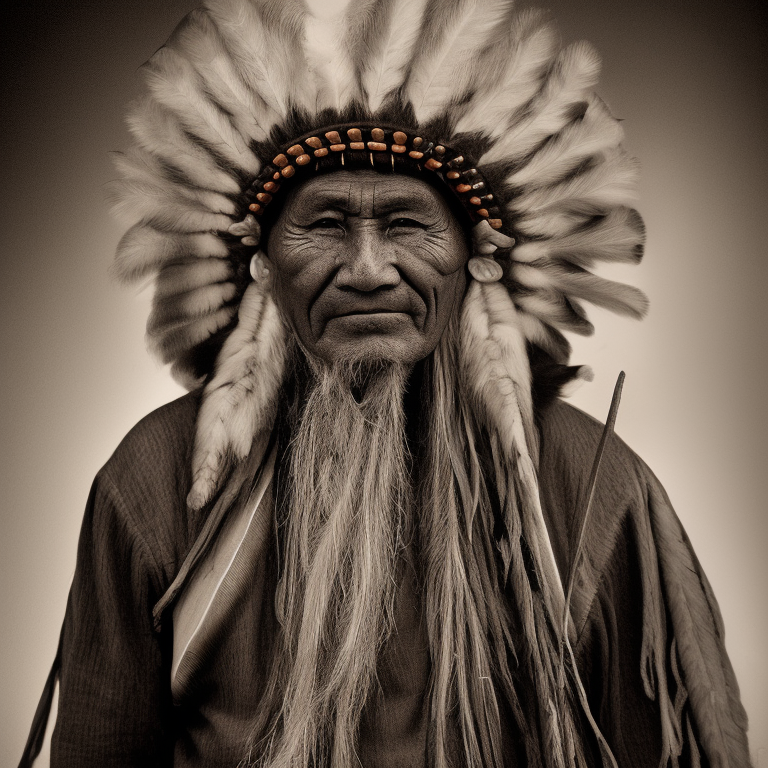

In [ ]:
NUM_INFERENCE_STEPS = 20 # 7
GUIDANCE_SCALE = 7.5

generator = torch.Generator("cuda").manual_seed(0)
prompt = "portrait photo of a old warrior chief"
image = pipe(prompt, num_inference_steps=NUM_INFERENCE_STEPS, guidance_scale=GUIDANCE_SCALE, generator=generator).images[0]

image

In [ ]:
# Utils

def get_inputs(prompt, batch_size=1, num_inference_steps=20):
  generator = [torch.Generator("cuda").manual_seed(i) for i in range(batch_size)]
  prompts = [prompt for _ in range(batch_size)]

  return {"prompt": prompts, "generator": generator, "num_inference_steps": num_inference_steps}

def image_grid(imgs, rows=2, cols=2):
    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

  0%|          | 0/20 [00:00<?, ?it/s]

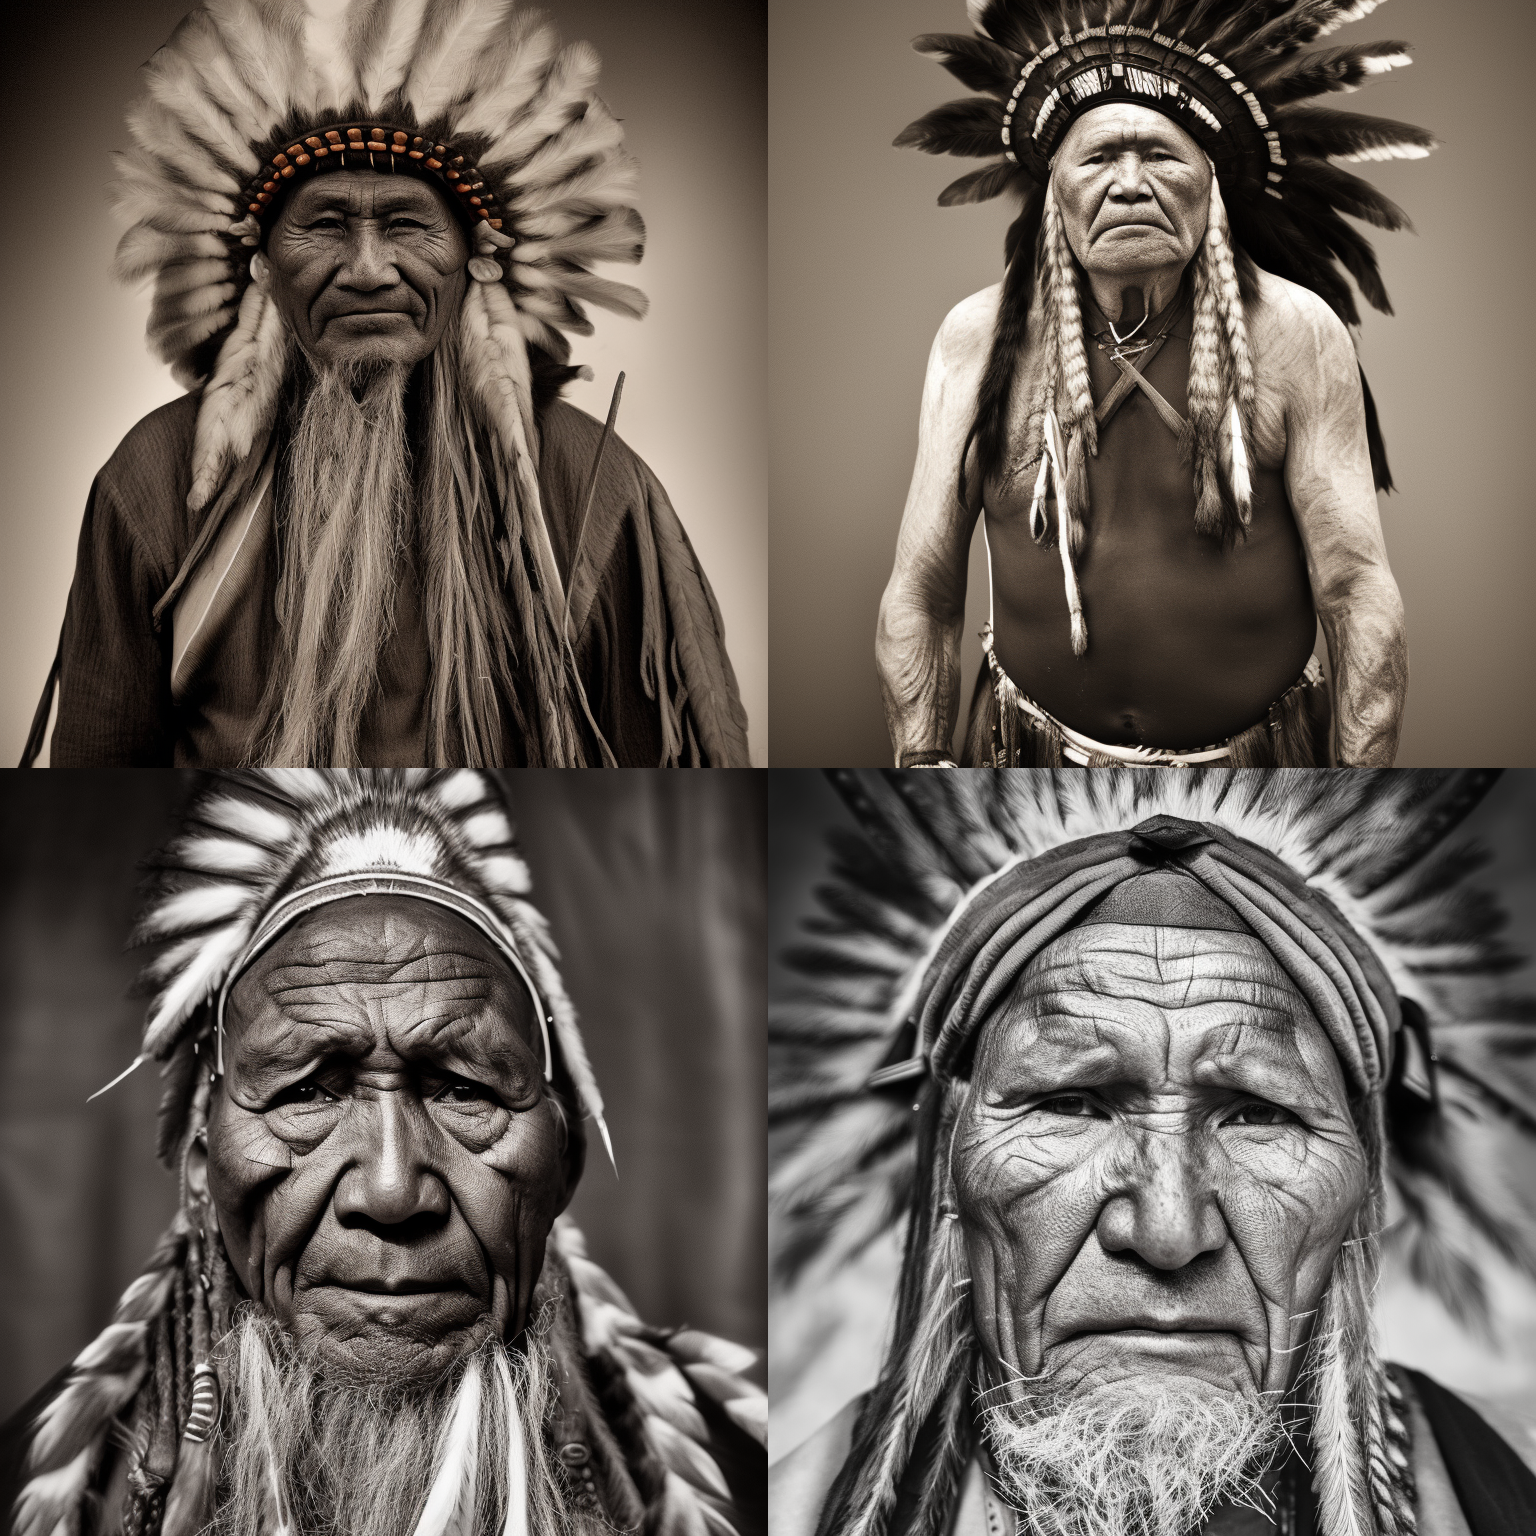

In [ ]:
images = pipe(**get_inputs(prompt=prompt, batch_size=4)).images
image_grid(images)

In [ ]:
def encode_image_vae(pipe, image):
    image_tensor = torch.pil_to_tensor(image)
    return image_tensor

In [ ]:
image_tensor = torch.pil_to_tensor(image)

AttributeError: module 'torch' has no attribute 'pil_to_tensor'

In [ ]:
pipe.vae(images[0])

AttributeError: 'Image' object has no attribute 'shape'

TODO:

- generate images [x]
- access vae []
- access initial distribution []
- access clip encoder []